In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import copy as cp
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, cross_val_predict 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import confusion_matrix, accuracy_score

from typing import Tuple

In [2]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_row", 160)
pd.set_option('max_colwidth', 200)

In [3]:
data = pd.read_csv('../../Data/20x42_D86015.csv')
data.head(5)

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,open_acc,total_acc,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,months_cr_line,term,initial_list_status,sub_grade,emp_length,MORTGAGE,OWN,RENT,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,Not Verified,Source Verified,Verified,loan_status_bin
0,-1.681284,-0.164637,0.846384,-0.431787,-0.431787,-0.632827,-1.683588,-0.515811,0.052865,0.087789,0.278320,-0.948659,-0.486876,-0.049447,-0.149813,-0.100298,-0.612943,-0.371035,-0.097500,-0.070014,0.915732,-1.427248,0.003312,-0.74366,-0.372678,0.95702,-0.188025,-0.300708,-0.841625,-0.243786,-0.121867,-0.207983,-0.201517,-0.201517,1.846240,-0.049447,-0.149813,-0.166039,1.256430,-0.755567,-0.575473,0.0
1,0.239648,-0.034893,-0.000947,-0.727333,-0.727333,1.345915,0.280950,0.317617,0.145098,-0.414380,-0.692823,-0.088150,-0.486876,-0.049447,-0.149813,-0.100298,-0.609911,3.369727,0.583889,-0.070014,0.915732,0.700649,-1.626161,-0.74366,-0.372678,0.95702,-0.188025,-0.300708,-0.841625,4.101961,-0.121867,-0.207983,-0.201517,-0.201517,-0.541641,-0.049447,-0.149813,-0.166039,-0.795906,1.323510,-0.575473,1.0
2,-0.858027,0.195402,0.643024,-0.431787,-0.431787,1.345915,-0.832317,-0.724168,-1.053928,1.562910,1.729659,-0.948659,-0.486876,-0.049447,-0.149813,-0.100298,-0.393788,-0.371035,2.905658,-0.070014,0.915732,0.700649,-0.268267,-0.74366,2.683282,-1.04491,-0.188025,-0.300708,-0.841625,-0.243786,-0.121867,-0.207983,-0.201517,-0.201517,1.846240,-0.049447,-0.149813,-0.166039,-0.795906,-0.755567,1.737702,0.0
3,0.239648,-0.002458,0.695168,0.159307,0.159307,1.345915,0.280950,1.567759,0.790727,2.745707,0.511251,-0.948659,-0.486876,-0.049447,-0.149813,-0.100298,1.183375,-0.371035,-0.690560,-0.070014,-1.092023,0.700649,-0.268267,1.34470,-0.372678,-1.04491,-0.188025,-0.300708,-0.841625,-0.243786,-0.121867,-0.207983,4.962358,-0.201517,-0.541641,-0.049447,-0.149813,-0.166039,-0.795906,1.323510,-0.575473,0.0
4,0.129880,-0.185915,1.112315,-0.431787,-0.431787,1.345915,0.169667,1.567759,2.081985,-0.384941,-0.660571,0.772360,-0.486876,-0.049447,-0.149813,0.093239,0.142970,-0.371035,-0.097500,-0.070014,0.915732,0.700649,-1.626161,-0.74366,2.683282,-1.04491,-0.188025,-0.300708,1.188177,-0.243786,-0.121867,-0.207983,-0.201517,-0.201517,-0.541641,-0.049447,-0.149813,-0.166039,-0.795906,-0.755567,1.737702,1.0


In [4]:
data.shape

(410, 42)

In [5]:
data.loan_status_bin.value_counts()
#0 = Defaulted Loans
#1 = Loans Paid In Full

1.0    359
0.0     51
Name: loan_status_bin, dtype: int64

In [6]:
X = data.drop('loan_status_bin', axis=1)
X.shape

(410, 41)

In [7]:
y = data['loan_status_bin']

In [8]:
lr1 = LogisticRegression()

In [9]:
steps = [('model', lr1)]
pipeline = Pipeline(steps=steps)

In [10]:
#Accuracy:

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
print(scores)

score = np.mean(scores)
print(score)

[0.86585366 0.81707317 0.86585366 0.87804878 0.86585366]
0.8585365853658538


In [11]:
#Aggregated Confusion Matrix From RepeatedStratifiedKFold: 
y_pred = cross_val_predict(pipeline, X, y, cv=cv, n_jobs=-1)
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[  0,  51],
       [  7, 352]])

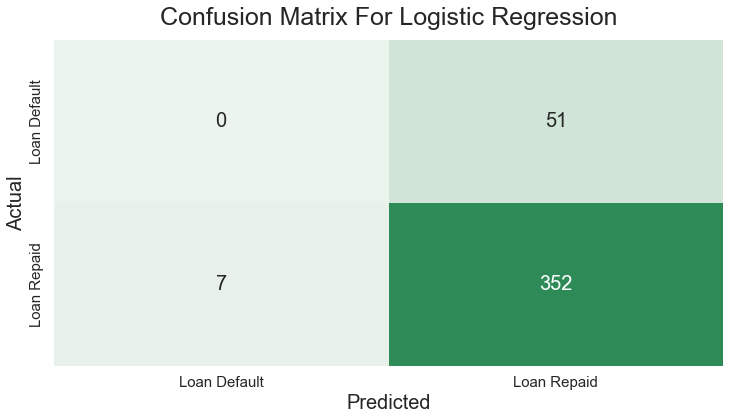

In [12]:
sns.set(rc = {'figure.figsize':(12,6)})
#cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
cmap = sns.light_palette('seagreen', as_cmap=True)

res = sns.heatmap(conf_mat, annot=True, fmt='d', annot_kws={"size":20},
#            xticklabels = ['Good = Paid In Full', 'Bad = Default'],
#            yticklabels = ['Loan Paid In Full', 'Bad = Default'], 
            cmap=cmap, cbar=False)

res.set_xticklabels(['Loan Default', 'Loan Repaid'], fontsize=15)
res.set_yticklabels(['Loan Default', 'Loan Repaid'], fontsize=15)


plt.title('Confusion Matrix For Logistic Regression', fontsize=25, pad=15)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20);

In [13]:
accuracy_score(y, y_pred)

0.8585365853658536

In [14]:
TN, FP, FN, TP = conf_mat.ravel()
print(TP)
print(FP)
print(FN)
print(TN)
print((TP + TN) / (TN + TP + FP + FN))

352
51
7
0
0.8585365853658536


In [15]:
#Re-examine original pool of accepted LC Loans: 

print(data.loan_status_bin.value_counts())
#0 = Loan Defaulted
#1 = Loan Fully Paid

good_loan = data.loan_status_bin.value_counts()[1]
bad_loan = data.loan_status_bin.value_counts()[0]

print()
print(good_loan / (good_loan + bad_loan))

#Random investment would give us 59% chance of pickkng a good loan

1.0    359
0.0     51
Name: loan_status_bin, dtype: int64

0.875609756097561


In [16]:
#Positive Predictive Value (or Precision)
#Logistic Model only does 3% better than Null Model or "random investment"
TP / (TP+FP)

0.8734491315136477

In [17]:
#Obtain predicted probabilities (not predicted classes) from RSKF: 
y_pred_prob = cross_val_predict(pipeline, X, y, cv=cv, n_jobs=-1, method='predict_proba')

In [18]:
y_pred_prob

array([[9.37333500e-02, 9.06266650e-01],
       [1.02438606e-02, 9.89756139e-01],
       [3.38235904e-01, 6.61764096e-01],
       [2.23763647e-02, 9.77623635e-01],
       [4.83838699e-01, 5.16161301e-01],
       [1.21007835e-01, 8.78992165e-01],
       [9.56666763e-02, 9.04333324e-01],
       [5.22462713e-02, 9.47753729e-01],
       [1.17803621e-01, 8.82196379e-01],
       [8.98896486e-02, 9.10110351e-01],
       [1.50182793e-02, 9.84981721e-01],
       [1.19945119e-01, 8.80054881e-01],
       [4.36260160e-02, 9.56373984e-01],
       [9.14889877e-02, 9.08511012e-01],
       [1.85240490e-03, 9.98147595e-01],
       [4.86064972e-02, 9.51393503e-01],
       [3.12388485e-01, 6.87611515e-01],
       [7.75365781e-02, 9.22463422e-01],
       [2.01175266e-01, 7.98824734e-01],
       [1.08138112e-01, 8.91861888e-01],
       [8.91355665e-02, 9.10864434e-01],
       [1.21540564e-02, 9.87845944e-01],
       [1.92109807e-01, 8.07890193e-01],
       [3.81676272e-02, 9.61832373e-01],
       [7.080436

In [31]:
#Obtaining classification based on desired threshold of 0.8: 

y_pred_success = (y_pred_prob[:, 1] > 0.8).astype('float')
y_pred_success

array([1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [32]:
conf_mat = confusion_matrix(y, y_pred_success)
conf_mat

array([[ 23,  28],
       [172, 187]])

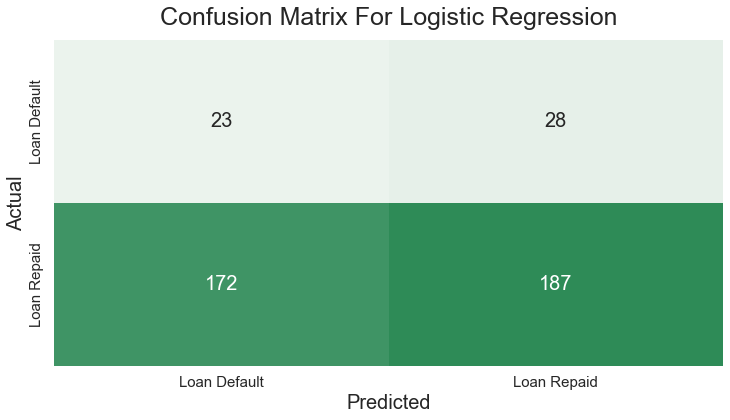

In [33]:
sns.set(rc = {'figure.figsize':(12,6)})
#cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
cmap = sns.light_palette('seagreen', as_cmap=True)

res = sns.heatmap(conf_mat, annot=True, fmt='d', annot_kws={"size":20},
#            xticklabels = ['Good = Paid In Full', 'Bad = Default'],
#            yticklabels = ['Loan Paid In Full', 'Bad = Default'], 
            cmap=cmap, cbar=False)

res.set_xticklabels(['Loan Default', 'Loan Repaid'], fontsize=15)
res.set_yticklabels(['Loan Default', 'Loan Repaid'], fontsize=15)


plt.title('Confusion Matrix For Logistic Regression', fontsize=25, pad=15)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20);

In [34]:
accuracy_score(y, y_pred_success)

0.5121951219512195

In [35]:
TN, FP, FN, TP = conf_mat.ravel()
print(TP)
print(FP)
print(FN)
print(TN)
print((TP + TN) / (TN + TP + FP + FN))

187
28
172
23
0.5121951219512195


In [36]:
#Positive Predictive Value (or Precision)
#Logistic Model only does 3% better than Null Model or "random investment"
TP / (TP+FP)

0.8697674418604651

In [ ]:
## Next question. what was characteristic of the 217 loans that defaulted??
## Get all loans which you predicted greater than 80% and find out which ones defaulted.
## Any pattern?????

In [ ]:
#Do we drop all observations where the source is not verified? 
#Do we drop all observations loan amount is greater than half of one's income? 